## Supervised learning: classification

In this exercise we will work with two types of classification models. To do so, we will make use of functions from the SKLEARN library. This library contains a lot of machine learning algorithms that are used in practise, so it is very valuable to familiarize yourself with the SKLEARN library.

## Libraries

In [43]:
import numpy
import pandas as pd

from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from sklearn import tree 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


## Read the data

In [44]:
iris = pd.read_csv('https://raw.githubusercontent.com/Daphne310/TrainingCases/master/iris-data-training.csv')
iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data preparation 

We just loaded the iris dataset. It contains data of three types of irisses. The features are measures of the lenght and width of the sepal and petal. Let's first split the data in features and targets. The iris dataset is a well-defined set for educational purposes, but in practise you will have to define the features and targets before this step.  

In [45]:
data = iris[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values
target = iris['class'].values

To get a better understanding of the data, we will print the first example. 

In [46]:
print('The features of the first example are: ', data[0])

The features of the first example are:  [5.1 3.5 1.4 0.2]


In [47]:
print('The label of the first example is: ', target[0])

The label of the first example is:  Iris-setosa


The next thing to do is to create a trainset and a testset.

In [122]:
X_train, X_test, y_train, y_test = train_test_split(data, target, 
                                                  test_size=1/3, random_state=0)

print('The number of measurements are: ', data.shape[0])
print('The number of training measurements are: ',X_train.shape[0])
print('The number of test measurements are: ',X_test.shape[0])

The number of measurements are:  150
The number of training measurements are:  100
The number of test measurements are:  50


## Decision Tree Classifier 

To construct the classifier, we follow a few simple steps: 

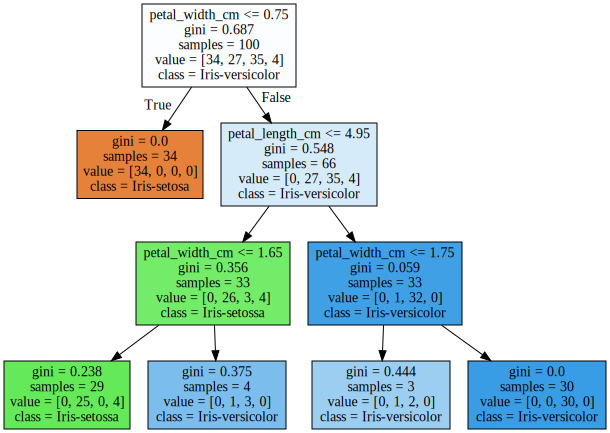

In [123]:
#STEP 1: Choose the type of classifier 
DTalgorithm = tree.DecisionTreeClassifier(random_state=0)

#STEP 2: Fit the model to the train data
DTalgorithm = DTalgorithm.fit(X_train, y_train)

#STEP 3: Predict the labels of the test data 
Pred_DT = DTalgorithm.predict(X_test)

graph = Source(tree.export_graphviz(DTalgorithm, out_file=None
   , feature_names=list(iris.columns[:-1]), class_names=pd.unique(iris['class']) 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

Congratulations! You just made a predictive algorithm!

The variable 'Pred_DT' holds the predictions made by the algorithm. Now let's take a look at your performance using classification accuracy. 

In [124]:
DT_CA = accuracy_score(y_test, Pred_DT) 

print('The Decision Tree Classifier reached a Classification Accuracy of: ', DT_CA)

The Decision Tree Classifier reached a Classification Accuracy of:  0.94


## K-Nearest Neighbors 

To construct the classifier, we follow a few simple steps: 

In [125]:
#STEP 1: Choose the type of classifier 
KNNalgorithm = KNeighborsClassifier(n_neighbors = 3)

#STEP 2: Fit the model to the train data
KNNalgorithm = KNNalgorithm.fit(X_train, y_train)

#STEP 3: Predict the labels of the test data 
Pred_KNN = KNNalgorithm.predict(X_test)

Congratulations! You did it again!

The variable 'Pred_KNN' holds the predictions made by the algorithm. Now let's take a look at your performance using classification accuracy. 

In [126]:
KNN_CA = accuracy_score(y_test, Pred_KNN) 

print('The K-Nearest Neighbors Classifier reached a Classification Accuracy of: ', KNN_CA)

The K-Nearest Neighbors Classifier reached a Classification Accuracy of:  0.88


# Did you get a good score? 

By know you probably know the drill. Tuning the parameters might help to reach a better performance. For K-Nearest Neighbors the most important parameter is the number of neighbors taken into account. The code now says 'n_neighbors = 3'. Play around with the number to see if the model can be improved. 


## Evaluation 

What model eventually reached the highest classification accuracy? 

In [ ]:
print('The Decision Tree Classifier reached a Classification Accuracy of: ', DT_CA)
print('The K-Nearest Neighbors Classifier reached a Classification Accuracy of: ', KNN_CA)

## Question
Is this test enough to determine which model has the best fit?
Tip: change the values of the random_state in train/test split and in the decision tree model